# Load graph edgelist and create a graph

In [1]:
import spartan as st

Using backend cpu


In [2]:
# rich graph tuples
tensor_data = st.loadTensor(path = "./inputData/yelp.tensor.gz", header=None, 
                            dtype={0:int, 1:int, 2:str, 3:int, 4:int} )

In [3]:
# generate sparse tensor
stensor = tensor_data.toSTensor(hasvalue=True, mappers={2:st.TimeMapper(timeformat='%Y-%m-%d')})

In [4]:
# create bipartite graph
graph = st.Graph(stensor, bipartite=True, weighted=True, modet=2)

In [5]:
edgelist = graph.get_edgelist_array()

In [6]:
graph.graph_tensor

STensor(<COO: shape=(5886, 509, 3857, 6), dtype=int64, nnz=9998, fill_value=0>)

In [7]:
type(graph.graph_tensor.sum_to_scipy_sparse(modes=(0,1)))

scipy.sparse.coo.coo_matrix

## Degree of user and msg

In [8]:
# count degree
rdegrees, cdegrees = graph.degrees()

<ipython-input-9-24ebdaeb9969>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figuser.show()


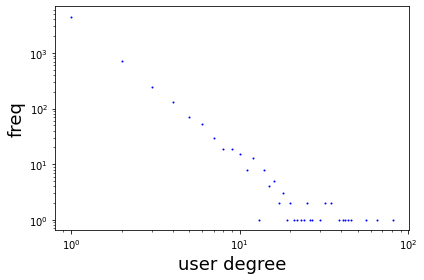

In [9]:
# degree distributions
uniqued, fod = graph.degree_dist(axis=1)
# draw user degree dist
figuser = st.plot_dist(uniqued, fod, 'user degree', 'freq')
figuser.show()

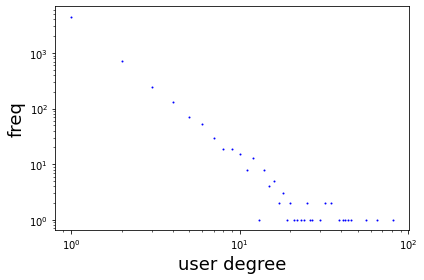

In [ ]:
# msg degree dist
uniqued, fod = graph.degree_dist(axis=0)
# draw the dist
figmsg = st.plot_dist(uniqued, fod, 'msg degree', 'freq')
figmsg.show()

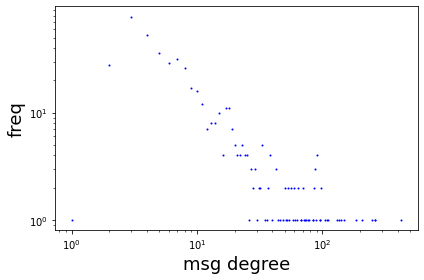